In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
df['Gender'] = df['Gender'].map({'Male':1, 'Female':0})
df['Age'] = pd.cut(df['Age'], [0, 20, 40, 60, 100], labels=[0,1,2,3])

X = df[['Age', 'Gender']]
y = df[['Spending Score (1-100)']]

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=4, test_size=0.2)

In [20]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

model = DecisionTreeClassifier(criterion="entropy", max_depth=3)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [21]:
from sklearn.metrics import mean_absolute_error
y_pred = model.predict(X_test)
mean_absolute_error(y_true = y_test, y_pred = y_pred)

27.85

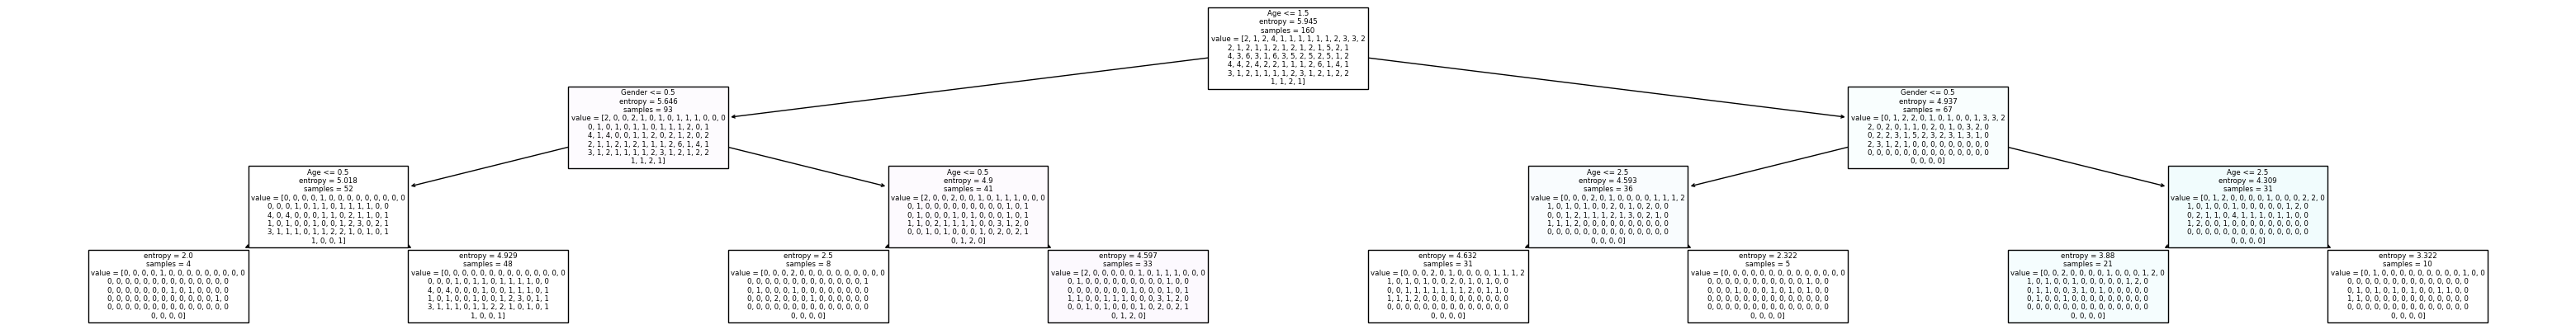

In [24]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(40, 5))
_ = plot_tree(model, filled=True, feature_names=['Age', 'Gender'])